# Supervised Machine Learning
* K-Nearest Neighbors
* Linear Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

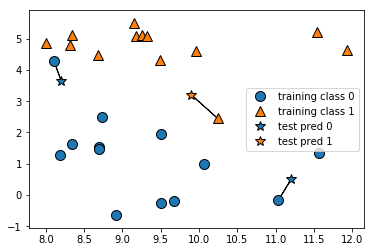

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

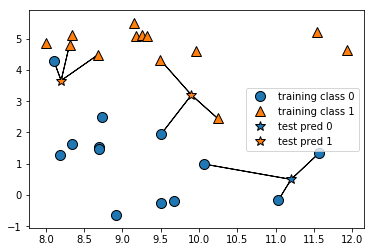

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

## K-nearest neighbors

### Forge dataset example (made-up)

In [4]:
#Import the data splitter and the Estimator class for this algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Call the forge dataset and split it into training and testing
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Create an instance of the class
clf = KNeighborsClassifier(n_neighbors = 3)

#Fit the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [5]:
print("Test set predictions: ", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions:  [1 0 1 0 1 0 0]
Test set accuracy: 0.86


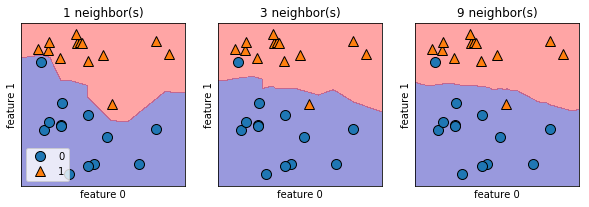

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))

#Graph the regions that belong to each of the two classes in forge dataset
for n_neighbors, ax in zip([1,3,9], axes):
    #The fit method returns the object self, so we can instantiate
    #And fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax=ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

### Breast cancer example (real world)

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print("Target names: ", cancer['target_names'])
print("\nFeatures: ", cancer["feature_names"])
print("\nDescription:", cancer['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Target names:  ['malignant' 'benign']

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Description: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - ra

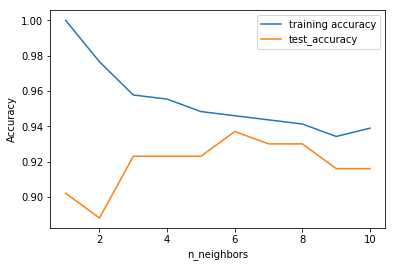

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'],
                                                    stratify = cancer['target'], random_state=66)

training_accuracy = []
test_accuracy = []
#Try n_neighbors from 1 to 10
neighbors_settings= range(1,11)

for n_neighbors in neighbors_settings:
    # Call the estimator class
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train, y_train)
    #Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #Recrd generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
#Plot it :v
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label ="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### K-neighbors regressions
It is implemented using the KNeighborsRegressor class in scikit-learn

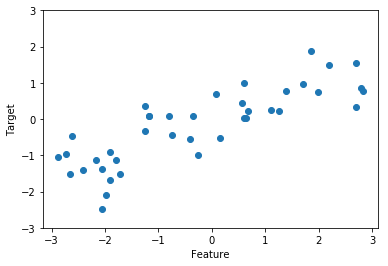

In [10]:
# Load the waves data set
X,y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

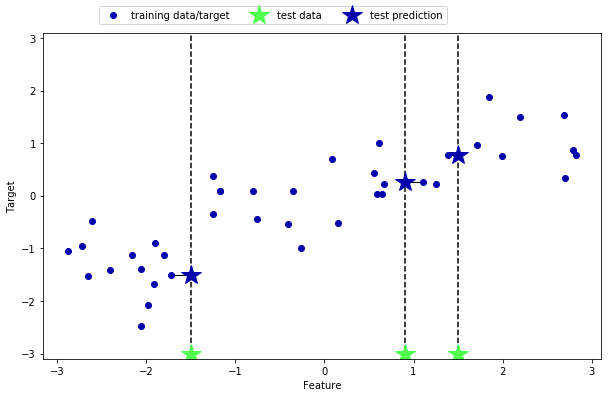

In [18]:
# Plot a sample predictions graph with a single closest neighbor
mglearn.plots.plot_knn_regression(n_neighbors = 1)

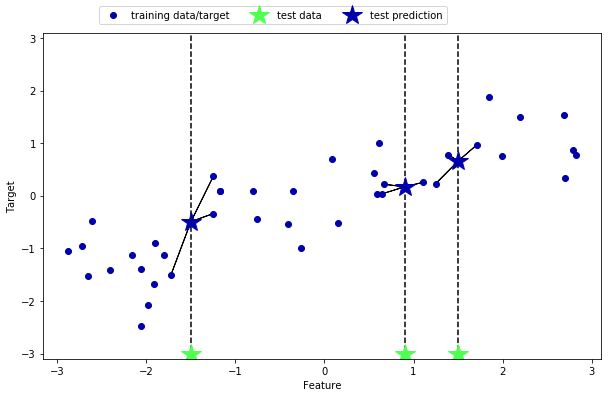

In [19]:
# Plot a sample prediction graph with several closest neighbors
mglearn.plots.plot_knn_regression(n_neighbors = 3
                                 )

In [21]:
# Import the Estimator class
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

#Instantiate the model and set number of neighbors to 3 and fit the model
reg = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)


In [22]:
# Make predictions on the test set:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


#### Note:
Regression models use R^2 to calculate the goodness of a prediction. A value of 1 correspondes to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses (y_train)

In [23]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Now we can visualize how the predictions of the model look.

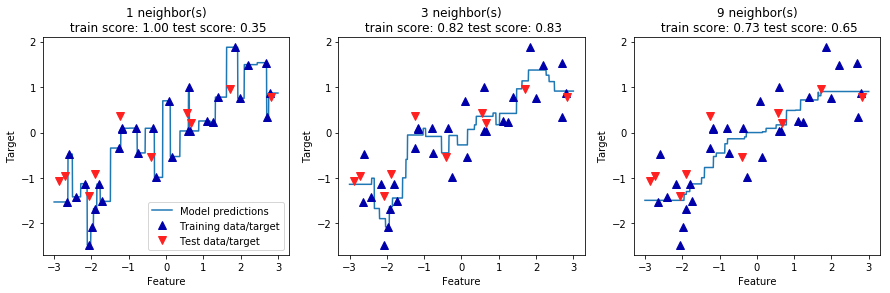

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

## Linear Models

w[0]: 0.393906  b: -0.031804


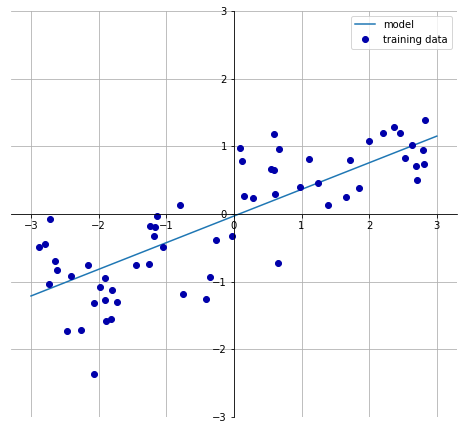

In [28]:
#Plot a linear Regression model with the wave dataset
mglearn.plots.plot_linear_regression_wave()

### Linear Regression (aka Ornidary Least Squares)

#### Apply it on the waves dataset

In [30]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)

print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


In [32]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


#### Apply it on the boston housing extended

In [35]:
#Load the dataset
X, y = mglearn.datasets.load_extended_boston()

#Split it
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


The difference between the two R^2 is caused by overfitting, as the training set is composed of over 100 features

### Ridge regression